# Case Study 6.1 - NYC Taxi Trips

<h1 style="color: red;">Note: If you close this notebook at any time, you will have to run all cells again upon re-opening it.</h1>

<h1 style="color: red;">Note: You may get different numerical results running the notebook different times. This is to be expected, you can just report whatever results you get.</h1>

# ADVANCED PYTHON

As this is an advanced version, we don't include a lot of code here. If you get stuck on a particular part, feel free to also use the beginner version in `beginnner_python.ipynb` to help you out.

If you don't know your MITx username, you can create a test post [here](https://courses.xpro.mit.edu/courses/course-v1:xPRO+DSx+R11/discussion/forum/general/threads/5db91a5c59a54c4eb6000031) to find it.

# Identification Information

In [1]:
# YOUR NAME              = Armen Khachatrian
# YOUR MITX PRO USERNAME = armen-khachatrian
# YOUR MITX PRO E-MAIL   = aa.khachatryan97@gmail.com

# Setup

Run these cells to install all the packages you need to complete the remainder of the case study. This may take a few minutes, so please be patient.

<h1 style="color: red;">Note: You may see red errors when you run the cell below. As long as you can run the Import cell below and see "Import successful!", you can continue with the case study.</h1>

In [2]:
!pip install --upgrade pip
!pip install featuretools==0.1.19
!pip install pandas==0.20.3

Requirement already up-to-date: pip in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (19.3.1)


# Import

In [3]:
import featuretools as ft
import matplotlib
import numpy as np
import pandas as pd
import utils
from featuretools.primitives import (Count, Day, Hour, Max, Mean, Median, Min,
                                     Minute, Month, Std, Sum, Week, Weekday,
                                     Weekend)
from sklearn.ensemble import GradientBoostingRegressor
from utils import (compute_features, feature_importances, load_nyc_taxi_data,
                   preview)

In [4]:
%matplotlib inline

# Data

- Use `load_nyc_taxi_data` to get the data.
- Use `preview` to preview the data.
- Create a histogram of the `trip_duration` column of the `trips` table.

In [5]:
trips, pickup_neighborhoods, dropoff_neighborhoods = load_nyc_taxi_data()
preview(trips, 10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,trip_duration,pickup_neighborhood,dropoff_neighborhood
0,514030,2,2016-04-02 00:00:00,2016-04-02 00:17:00,1,2.46,-73.987595,40.754711,-73.959633,40.762836,1,1039,AA,K
1,514031,1,2016-04-02 00:00:00,2016-04-02 00:24:00,2,7.90,-73.924713,40.745567,-73.972763,40.793354,1,1454,L,U
2,514032,1,2016-04-02 00:00:00,2016-04-02 00:19:00,1,1.00,-73.989800,40.732994,-74.000557,40.742622,1,1168,H,Q
3,514033,2,2016-04-02 00:00:00,2016-04-02 00:01:00,1,0.02,-73.987465,40.719822,-73.987289,40.720016,2,35,AC,AC
4,514034,1,2016-04-02 00:01:00,2016-04-02 00:58:00,2,19.00,-73.790131,40.643429,-73.975594,40.779327,1,3470,G,I
5,514035,1,2016-04-02 00:01:00,2016-04-02 00:09:00,2,1.50,-73.981956,40.765518,-73.968124,40.753407,1,458,AR,N
6,514036,1,2016-04-02 00:01:00,2016-04-02 00:05:00,1,1.50,-73.980019,40.780594,-73.968132,40.799595,2,213,AV,U
7,514037,1,2016-04-02 00:01:00,2016-04-02 00:20:00,1,4.20,-73.990501,40.756561,-73.986008,40.719414,2,1142,AA,AC
8,514038,1,2016-04-02 00:01:00,2016-04-02 00:10:00,1,0.60,-73.986198,40.730492,-73.991798,40.722240,1,501,AT,AC
9,514039,1,2016-04-02 00:01:00,2016-04-02 00:17:00,1,0.60,-73.990959,40.734890,-74.001816,40.739319,1,954,R,Q


In [6]:
trips.shape[0]

10000

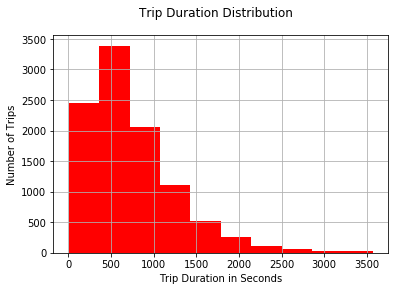

In [7]:
import matplotlib.pyplot as plt
trips.trip_duration.hist(color = 'red')
plt.xlabel('Trip Duration in Seconds')
plt.ylabel('Number of Trips')
plt.suptitle('Trip Duration Distribution')
plt.show()

<h1 style="color: red;">QUESTION 1: DATA ANALYSIS</h1>

**Describe the dataset. How many trips are in the dataset? How would you describe the distribution of trip durations? Is there anything else we should observe? Make sure the histogram is visible in the notebook.**

In [8]:
import statistics as stat
from scipy.stats import iqr
mean = stat.mean(trips.trip_duration)
median = stat.median(trips.trip_duration)
#mode = stat.mode(trips.trip_duration)
range_duration = max(trips.trip_duration) - min (trips.trip_duration)
iqr = iqr(trips.trip_duration)
print('mean = ', mean)
print('median = ', median)
#print('mode = ', mode)
print('range = ', range_duration)
print('interquartile range (IQR) = ', iqr)

mean =  746
median =  616.0
range =  3571
interquartile range (IQR) =  624.0


### 1. How many trips are in the dataset?
Answer: 10000
### 2. How would you describe the distribution of trip durations?
Shape: right-skewed distribution

In terms of trip_duration:

   #### Mean =  746
    
   #### Median =  616.0
    
   #### Range =  3571
    
   #### Interquartile range (IQR) =  624.0
    
   #### No mode 
    
   #### No apparent outliers

# Entities and Relationships

Construct a dictionary of entities and relationships. You can read about the format of these objects `here`.

In [9]:
entities = {
    "trips": (trips, "id", 'pickup_datetime'),
    "pickup_neighborhoods": (pickup_neighborhoods, "neighborhood_id"),
    "dropoff_neighborhoods": (dropoff_neighborhoods, "neighborhood_id"),
}

relationships = [("pickup_neighborhoods", "neighborhood_id", "trips", "pickup_neighborhood"),
                 ("dropoff_neighborhoods", "neighborhood_id", "trips", "dropoff_neighborhood")]

# Transform Primitives

In [10]:
trans_primitives = [Weekend]

In [11]:
features = ft.dfs(entities=entities,
                  relationships=relationships,
                  target_entity="trips",
                  trans_primitives=trans_primitives,
                  agg_primitives=[],
                  ignore_variables={"trips": ["pickup_latitude", "pickup_longitude",
                                              "dropoff_latitude", "dropoff_longitude", "trip_duration"]},
                  features_only=True)

In [12]:
print(f"Number of features: {len(features)}")
features

Number of features: 12


[<Feature: vendor_id>,
 <Feature: passenger_count>,
 <Feature: trip_distance>,
 <Feature: payment_type>,
 <Feature: pickup_neighborhood>,
 <Feature: dropoff_neighborhood>,
 <Feature: IS_WEEKEND(pickup_datetime)>,
 <Feature: IS_WEEKEND(dropoff_datetime)>,
 <Feature: pickup_neighborhoods.latitude>,
 <Feature: pickup_neighborhoods.longitude>,
 <Feature: dropoff_neighborhoods.latitude>,
 <Feature: dropoff_neighborhoods.longitude>]

In [13]:
feature_matrix = compute_features(features)
preview(feature_matrix, 5)

Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|██████████|| Calculated: 1/1 cutoff times
Finishing computing...


,trip_distance,pickup_neighborhood = AA,pickup_neighborhood = D,pickup_neighborhood = AC,pickup_neighborhood = AB,pickup_neighborhood = AO,pickup_neighborhood = AD,pickup_neighborhood = Q,pickup_neighborhood = AR,pickup_neighborhood = AP,...,dropoff_neighborhood = M,dropoff_neighborhood = AF,dropoff_neighborhood = T,dropoff_neighborhood = B,dropoff_neighborhood = AI,dropoff_neighborhood = AE,dropoff_neighborhood = AQ,pickup_neighborhoods.longitude,IS_WEEKEND(dropoff_datetime),vendor_id
id,,,,,,,,,,,,,,,,,,,,,
514030,2.46,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-73.986446,True,2
514031,7.90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-73.919159,True,1
514032,1.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-73.991595,True,1
514033,0.02,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-73.987205,True,2
514034,19.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-73.785073,True,1


# First Model

In [14]:
X_train, y_train, X_test, y_test = utils.get_train_test_fm(feature_matrix, trips, .75) # DATA SPLIT 75%

In [15]:
y_train = np.log(y_train + 1)
y_test = np.log(y_test + 1)

In [16]:
model = GradientBoostingRegressor(verbose=True)
model.fit(X_train, y_train)
print(model.score(X_test, y_test)) #SCORE

      Iter       Train Loss   Remaining Time 
         1           0.4736            8.28s
         2           0.4148            7.70s
         3           0.3661            8.09s
         4           0.3266            8.12s
         5           0.2934            7.71s
         6           0.2665            7.89s
         7           0.2441            7.91s
         8           0.2257            7.58s
         9           0.2103            7.39s
        10           0.1973            7.31s
        20           0.1433            6.29s
        30           0.1308            5.32s
        40           0.1252            4.26s
        50           0.1212            3.27s
        60           0.1187            2.49s
        70           0.1167            1.80s
        80           0.1155            1.14s
        90           0.1143            0.55s
       100           0.1133            0.00s
0.755456069153074


<h1 style="color: red;">QUESTION 2: FIRST MODEL</h1>

**Describe all the features that we added to the model. Do you think these improved the performance from a model that did not have these features? Why?**

We add one transitive feature "weekend" which is boolean. I suppose it helps to our model as we can know is the certain trip happened on work days or not. But adding one feature does not adjust enough our model for trip prediction.

# More Transform Primitives

In [17]:
trans_primitives = [Minute, Hour, Day, Week, Month, Weekday, Weekend]

In [31]:
features = ft.dfs(entities=entities,
                  relationships=relationships,
                  target_entity="trips",
                  trans_primitives=trans_primitives,
                  agg_primitives=[],
                  ignore_variables={"trips": ["pickup_latitude", "pickup_longitude",
                                              "dropoff_latitude", "dropoff_longitude", "trip_duration"]},
                  features_only=True)
print(f"Number of features: {len(features)}")
features

Number of features: 24


[<Feature: vendor_id>,
 <Feature: passenger_count>,
 <Feature: trip_distance>,
 <Feature: payment_type>,
 <Feature: pickup_neighborhood>,
 <Feature: dropoff_neighborhood>,
 <Feature: MINUTE(pickup_datetime)>,
 <Feature: MINUTE(dropoff_datetime)>,
 <Feature: HOUR(pickup_datetime)>,
 <Feature: HOUR(dropoff_datetime)>,
 <Feature: DAY(pickup_datetime)>,
 <Feature: DAY(dropoff_datetime)>,
 <Feature: WEEK(pickup_datetime)>,
 <Feature: WEEK(dropoff_datetime)>,
 <Feature: MONTH(pickup_datetime)>,
 <Feature: MONTH(dropoff_datetime)>,
 <Feature: WEEKDAY(pickup_datetime)>,
 <Feature: WEEKDAY(dropoff_datetime)>,
 <Feature: IS_WEEKEND(pickup_datetime)>,
 <Feature: IS_WEEKEND(dropoff_datetime)>,
 <Feature: pickup_neighborhoods.latitude>,
 <Feature: pickup_neighborhoods.longitude>,
 <Feature: dropoff_neighborhoods.latitude>,
 <Feature: dropoff_neighborhoods.longitude>]

In [32]:
feature_matrix = compute_features(features)
preview(feature_matrix, 5)

Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|██████████|| Calculated: 1/1 cutoff times
Finishing computing...


,IS_WEEKEND(dropoff_datetime),pickup_neighborhoods.longitude,payment_type,pickup_neighborhoods.latitude,WEEKDAY(pickup_datetime),HOUR(pickup_datetime),dropoff_neighborhood = D,dropoff_neighborhood = AA,dropoff_neighborhood = H,dropoff_neighborhood = P,...,pickup_neighborhood = AW,pickup_neighborhood = S,pickup_neighborhood = AF,pickup_neighborhood = T,pickup_neighborhood = AI,pickup_neighborhood = AE,pickup_neighborhood = B,pickup_neighborhood = AQ,vendor_id,MONTH(pickup_datetime)
id,,,,,,,,,,,,,,,,,,,,,
514030,True,-73.986446,1,40.757707,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,4
514031,True,-73.919159,1,40.744928,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
514032,True,-73.991595,1,40.729652,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
514033,True,-73.987205,2,40.720245,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,4
514034,True,-73.785073,1,40.646194,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4


In [20]:
X_train, y_train, X_test, y_test = utils.get_train_test_fm(feature_matrix, trips, .75)
y_train = np.log(y_train + 1)
y_test = np.log(y_test + 1)

In [33]:
model = GradientBoostingRegressor(verbose=True)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

      Iter       Train Loss   Remaining Time 
         1           0.4736            7.11s
         2           0.4148            7.27s
         3           0.3661            7.28s
         4           0.3266            7.22s
         5           0.2934            7.34s
         6           0.2665            7.41s
         7           0.2441            7.57s
         8           0.2257            7.52s
         9           0.2103            7.70s
        10           0.1973            7.66s
        20           0.1433            6.59s
        30           0.1308            5.53s
        40           0.1252            4.47s
        50           0.1212            3.44s
        60           0.1187            2.65s
        70           0.1167            1.91s
        80           0.1155            1.22s
        90           0.1143            0.58s
       100           0.1133            0.00s
0.7554635962441666


<h1 style="color: red;">QUESTION 3: SECOND MODEL</h1>

**Describe the rest of the new features that we just added to the model. How did this affect performance? Did we have to sacrifice training time?**

We add Minute, Hour, Day, Week, Month, Weekday which are not boolean. The score becomes higher, and training time is reduced.

# Aggregation Primitives

In [34]:
trans_primitives = [Minute, Hour, Day, Week, Month, Weekday, Weekend]
aggregation_primitives = [Count, Sum, Mean, Median, Std, Max, Min]

features = ft.dfs(entities=entities,
                  relationships=relationships,
                  target_entity="trips",
                  trans_primitives=trans_primitives,
                  agg_primitives=aggregation_primitives,
                  ignore_variables={"trips": ["pickup_latitude", "pickup_longitude",
                                              "dropoff_latitude", "dropoff_longitude", "trip_duration"]},
                  features_only=True)

In [35]:
print(f"Number of features: {len(features)}")
features

Number of features: 62


[<Feature: vendor_id>,
 <Feature: passenger_count>,
 <Feature: trip_distance>,
 <Feature: payment_type>,
 <Feature: pickup_neighborhood>,
 <Feature: dropoff_neighborhood>,
 <Feature: MINUTE(pickup_datetime)>,
 <Feature: MINUTE(dropoff_datetime)>,
 <Feature: HOUR(pickup_datetime)>,
 <Feature: HOUR(dropoff_datetime)>,
 <Feature: DAY(pickup_datetime)>,
 <Feature: DAY(dropoff_datetime)>,
 <Feature: WEEK(pickup_datetime)>,
 <Feature: WEEK(dropoff_datetime)>,
 <Feature: MONTH(pickup_datetime)>,
 <Feature: MONTH(dropoff_datetime)>,
 <Feature: WEEKDAY(pickup_datetime)>,
 <Feature: WEEKDAY(dropoff_datetime)>,
 <Feature: IS_WEEKEND(pickup_datetime)>,
 <Feature: IS_WEEKEND(dropoff_datetime)>,
 <Feature: pickup_neighborhoods.latitude>,
 <Feature: pickup_neighborhoods.longitude>,
 <Feature: dropoff_neighborhoods.latitude>,
 <Feature: dropoff_neighborhoods.longitude>,
 <Feature: pickup_neighborhoods.COUNT(trips)>,
 <Feature: pickup_neighborhoods.SUM(trips.vendor_id)>,
 <Feature: pickup_neighborhoods

In [36]:
feature_matrix = compute_features(features)
preview(feature_matrix, 5)

Elapsed: 00:02 | Remaining: 00:00 | Progress: 100%|██████████|| Calculated: 1/1 cutoff times
Finishing computing...


,dropoff_neighborhoods.SUM(trips.trip_distance),dropoff_neighborhoods.MEDIAN(trips.trip_distance),WEEK(pickup_datetime),pickup_neighborhoods.MAX(trips.trip_distance),dropoff_neighborhoods.MEAN(trips.vendor_id),dropoff_neighborhoods.longitude,dropoff_neighborhoods.MAX(trips.vendor_id),HOUR(dropoff_datetime),pickup_neighborhoods.STD(trips.trip_distance),dropoff_neighborhoods.MIN(trips.trip_distance),...,dropoff_neighborhood = L,dropoff_neighborhood = M,dropoff_neighborhood = AF,dropoff_neighborhood = T,dropoff_neighborhood = B,dropoff_neighborhood = AI,dropoff_neighborhood = AE,dropoff_neighborhood = AQ,WEEK(dropoff_datetime),dropoff_neighborhoods.MEAN(trips.trip_distance)
id,,,,,,,,,,,,,,,,,,,,,
514030,603.25,1.37,13,18.89,1.572881,-73.956886,2.0,0,3.368966,0.00,...,0,0,0,0,0,0,0,0,13,2.044915
514031,443.74,1.54,13,16.40,1.574586,-73.969822,2.0,0,2.757987,0.30,...,0,0,0,0,0,0,0,0,13,2.451602
514032,556.44,1.60,13,17.90,1.518771,-74.005107,2.0,0,2.316361,0.00,...,0,0,0,0,0,0,0,0,13,1.899113
514033,714.12,1.90,13,17.38,1.510638,-73.987205,2.0,0,2.428094,0.00,...,0,0,0,0,0,0,0,0,13,2.532340
514034,661.57,1.62,13,26.60,1.529010,-73.976050,2.0,0,5.241291,0.17,...,0,0,0,0,0,0,0,0,13,2.257918


In [37]:
X_train, y_train, X_test, y_test = utils.get_train_test_fm(feature_matrix, trips, .75)
y_train = np.log(y_train + 1)
y_test = np.log(y_test + 1)

In [38]:
model = GradientBoostingRegressor(verbose=True)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

      Iter       Train Loss   Remaining Time 
         1           0.4736           11.80s
         2           0.4148           10.91s
         3           0.3661           11.20s
         4           0.3264           10.75s
         5           0.2930           10.23s
         6           0.2660           10.28s
         7           0.2432           10.09s
         8           0.2245           10.17s
         9           0.2090            9.97s
        10           0.1960            9.86s
        20           0.1363            8.49s
        30           0.1199            7.14s
        40           0.1112            5.62s
        50           0.1061            4.41s
        60           0.1027            3.43s
        70           0.1003            2.48s
        80           0.0982            1.61s
        90           0.0959            0.81s
       100           0.0898            0.00s
0.803792269365491


# Evaluate on Test Data

In [39]:
y_pred = model.predict(X_test)
y_pred = np.exp(y_pred) - 1

In [40]:
y_pred[:10]

array([ 431.26888289,  668.92177133,  653.30245515,  610.01057917,
        409.40473468, 1379.85856426,  464.95951329, 1158.80077087,
        662.95266873,  527.01944046])

In [ ]:
matplotlib.pyplot.hist(y_pred, color = 'green')
plt.xlabel('Trip Duration in Seconds')
plt.ylabel('Number of Trips')
plt.suptitle('Predictions')
plt.show()

<h1 style="color: red;">QUESTION 4: MODEL PREDICTIONS</h1>

**Analyze the model predictions. Does the output distribution match the one you made earlier in the case study? What other features/strategies could we use to make our model even better, if we had more time?**

Both graphs are right skrewed, and they look similar.

# Feature Importance

In [43]:
feature_importances(model, feature_matrix.columns, n=25)

1: Feature: trip_distance, 0.860
2: Feature: HOUR(pickup_datetime), 0.028
3: Feature: dropoff_neighborhoods.longitude, 0.027
4: Feature: dropoff_neighborhoods.latitude, 0.021
5: Feature: HOUR(dropoff_datetime), 0.012
6: Feature: MINUTE(dropoff_datetime), 0.007
7: Feature: MINUTE(pickup_datetime), 0.006
8: Feature: pickup_neighborhoods.latitude, 0.003
9: Feature: pickup_neighborhoods.SUM(trips.trip_distance), 0.003
10: Feature: dropoff_neighborhoods.COUNT(trips), 0.003
11: Feature: pickup_neighborhoods.longitude, 0.003
12: Feature: pickup_neighborhoods.COUNT(trips), 0.003
13: Feature: dropoff_neighborhoods.SUM(trips.trip_distance), 0.002
14: Feature: pickup_neighborhoods.MEDIAN(trips.trip_distance), 0.002
15: Feature: pickup_neighborhoods.MEAN(trips.trip_distance), 0.002
16: Feature: dropoff_neighborhoods.SUM(trips.passenger_count), 0.001
17: Feature: payment_type, 0.001
18: Feature: pickup_neighborhoods.STD(trips.trip_distance), 0.001
19: Feature: dropoff_neighborhoods.MEAN(trips.vendo

<h1 style="color: red;">QUESTION 5: FEATURE IMPORTANCE</h1>

**Analyze the feature importance values you just computed above. Do they make sense? Are there any values you are surprised by? Give some brief explanations as to why these features are relevant in computing the `trip_duration` target variable.**

*Type your response here...*

<hr>

Great job! Now, make sure you check out the **Conclusion** section of the [instruction manual](https://courses.edx.org/asset-v1:MITxPRO+DSx+2T2018+type@asset+block@6.1_instruction_manual.html) to wrap up this case study properly.